## MNIST + PCA
---
- Feature 784개 ==> 주요 Feature로 압축

In [24]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from tensorflow.keras.datasets.fashion_mnist import load_data
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### [1] 데이터 로딩

In [2]:
(x_train, y_train), (x_test, y_test) = load_data()

In [3]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
# reshaping the dataset
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

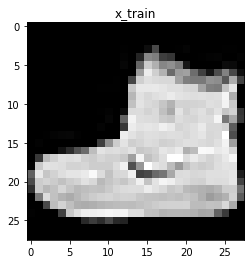

In [32]:
plt.imshow(x_train[0].reshape(28,28), cmap='gray')
plt.title(f'x_train')
plt.show()

## [2] MNIST의 PC (주성분 요소)수 찾기
---

In [5]:
# scaler=StandardScaler()
# x_train_scaled=scaler.transform(x_train)
# x_test_scaled=scaler.transform(x_test)

In [6]:
x_train=x_train/255.0
x_test=x_test/255.0

In [7]:
pca=PCA()

In [8]:
pca.fit(x_train)

PCA()

In [9]:
# 주성분 행렬
pca.singular_values_

array([1.09021490e+03, 8.52479041e+02, 4.96351983e+02, 4.50451242e+02,
       3.96842020e+02, 3.76362121e+02, 3.09588151e+02, 2.79263524e+02,
       2.35050555e+02, 2.31932387e+02, 2.01589034e+02, 1.93337272e+02,
       1.77041530e+02, 1.64321601e+02, 1.57731358e+02, 1.55374546e+02,
       1.50301484e+02, 1.46518431e+02, 1.36927202e+02, 1.36543425e+02,
       1.33231237e+02, 1.29082919e+02, 1.25491240e+02, 1.23484566e+02,
       1.21573059e+02, 1.19800971e+02, 1.16788185e+02, 1.14329866e+02,
       1.12289503e+02, 1.09560883e+02, 1.06209001e+02, 1.04158151e+02,
       1.03890877e+02, 1.02329258e+02, 1.00386297e+02, 9.82618014e+01,
       9.70860962e+01, 9.60758815e+01, 9.45630379e+01, 9.25612428e+01,
       9.05401026e+01, 8.95074107e+01, 8.92669456e+01, 8.64943417e+01,
       8.47183939e+01, 8.38862164e+01, 8.31180048e+01, 8.19234373e+01,
       8.11537068e+01, 7.96104343e+01, 7.89519605e+01, 7.83663167e+01,
       7.75132275e+01, 7.65881062e+01, 7.52305856e+01, 7.48815548e+01,
      

In [10]:
# 주성분에 투영 후 분산 정도 설명
pca.explained_variance_

array([1.98098057e+01, 1.21122105e+01, 4.10615661e+00, 3.38182839e+00,
       2.62477022e+00, 2.36084678e+00, 1.59744034e+00, 1.29982360e+00,
       9.20828072e-01, 8.96558812e-01, 6.77313601e-01, 6.22998726e-01,
       5.22403760e-01, 4.50033978e-01, 4.14659933e-01, 4.02360864e-01,
       3.76515209e-01, 3.57800138e-01, 3.12489521e-01, 3.10740295e-01,
       2.95847641e-01, 2.77711294e-01, 2.62471897e-01, 2.54144872e-01,
       2.46337582e-01, 2.39208531e-01, 2.27328458e-01, 2.17858935e-01,
       2.10152378e-01, 2.00063121e-01, 1.88009000e-01, 1.80818355e-01,
       1.79891572e-01, 1.74524192e-01, 1.67959608e-01, 1.60925709e-01,
       1.57097786e-01, 1.53845481e-01, 1.49038620e-01, 1.42795441e-01,
       1.36627447e-01, 1.33528502e-01, 1.32812006e-01, 1.24689931e-01,
       1.19622098e-01, 1.17283577e-01, 1.15145298e-01, 1.11859357e-01,
       1.09767231e-01, 1.05632115e-01, 1.03891933e-01, 1.02356366e-01,
       1.00140010e-01, 9.77639295e-02, 9.43289222e-02, 9.34556783e-02,
      

In [11]:
# 주성분에 투영 후 분산 정도 설명
pca.explained_variance_ratio_

array([2.90392279e-01, 1.77553100e-01, 6.01922198e-02, 4.95742800e-02,
       3.84765515e-02, 3.46076932e-02, 2.34169052e-02, 1.90541363e-02,
       1.34984344e-02, 1.31426709e-02, 9.92875162e-03, 9.13254895e-03,
       7.65792563e-03, 6.59705576e-03, 6.07850704e-03, 5.89821476e-03,
       5.51934287e-03, 5.24499833e-03, 4.58078922e-03, 4.55514728e-03,
       4.33683561e-03, 4.07097460e-03, 3.84758002e-03, 3.72551401e-03,
       3.61106681e-03, 3.50656193e-03, 3.33241175e-03, 3.19359785e-03,
       3.08062729e-03, 2.93272870e-03, 2.75602713e-03, 2.65061934e-03,
       2.63703362e-03, 2.55835311e-03, 2.46212276e-03, 2.35901271e-03,
       2.30289913e-03, 2.25522353e-03, 2.18475967e-03, 2.09324081e-03,
       2.00282407e-03, 1.95739658e-03, 1.94689347e-03, 1.82783182e-03,
       1.75354238e-03, 1.71926195e-03, 1.68791688e-03, 1.63974823e-03,
       1.60907972e-03, 1.54846297e-03, 1.52295361e-03, 1.50044371e-03,
       1.46795411e-03, 1.43312311e-03, 1.38276928e-03, 1.36996838e-03,
      

In [12]:
cumsum=np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum>=0.95)+1

print(f'주성분 갯수(차원): {d}')

주성분 갯수(차원): 187


In [13]:
## 지정된 PC 갯수로 주성분 데이터 압축/융합
pca=PCA(n_components=d)

In [14]:
pca.fit(x_train)

PCA(n_components=187)

In [15]:
mnistPCA=pca.transform(x_train)

In [16]:
mnistPCA.shape

(60000, 187)

In [17]:
# 압축된 피쳐성분기반 원래 성분 복원
reMnist=pca.inverse_transform(mnistPCA)


In [18]:
mnistPCA[:5]

array([[-4.86250160e-01,  6.40421332e+00, -4.74918114e+00,
         9.44286739e-01, -1.31307876e-02, -1.58564884e+00,
        -3.58845159e-01,  7.89706894e-01, -1.29081465e-01,
        -1.16899492e-01,  5.81472845e-01, -2.60731796e-01,
         1.94065999e-01, -5.38257783e-01,  4.35426617e-01,
        -1.79978693e-01,  4.56783772e-01, -7.61633440e-01,
         1.67180489e+00, -8.17897123e-01, -5.66988391e-01,
         6.59513355e-01,  3.93419193e-01, -1.51371585e-01,
         8.54238263e-01,  1.63963268e-01, -4.31274511e-01,
        -4.53374798e-01, -4.42621215e-01,  3.81110910e-01,
        -3.61096938e-01, -1.22821061e+00, -2.36710555e-01,
        -1.06260990e-01, -1.61453401e-01, -2.71632149e-01,
         1.63835013e-01, -5.68331669e-01,  4.51009622e-02,
        -5.01396723e-01, -2.49911811e-01, -3.52000284e-01,
         2.82273645e-01, -4.47815137e-01, -2.62428455e-01,
        -6.94296248e-01,  5.19902766e-01, -8.17156644e-02,
        -3.30268440e-01,  6.81819980e-02, -3.24060226e-0

In [19]:
# # PCA 전후 이미지 비교
# def drawimage(selecimg, title):
#     plt.show(selecimg.reshape(-1,187), cmap='gray')
#     plt.title(f'[{title}]')
#     plt.show()

In [21]:
# drawimage(mnistPCA[0], 'Re-MNIST')

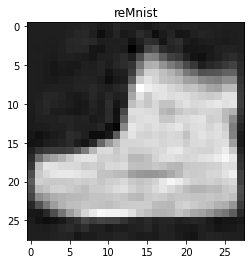

In [31]:
plt.imshow(reMnist[0].reshape(28,28), cmap='gray')
plt.title(f'reMnist')
plt.show()

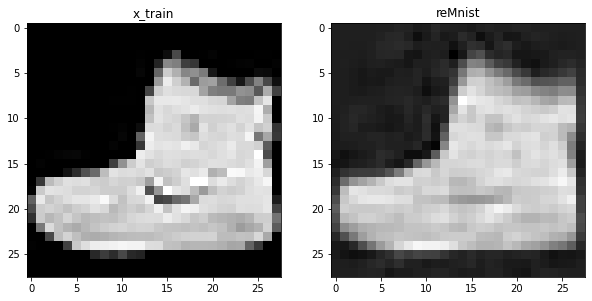

In [41]:
fig=plt.figure(figsize=(10,10))

plt.subplot(1, 2, 1)
plt.imshow(x_train[0].reshape(28,28), cmap='gray')
plt.title(f'x_train')

plt.subplot(1, 2, 2) 
plt.imshow(reMnist[0].reshape(28,28), cmap='gray')
plt.title(f'reMnist')
plt.show()